<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Medical_Insurance_Charge_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns
plt.style.use("ggplot")

In [56]:
pd.read_csv("/content/insurance (1).csv")

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
df=pd.read_csv("/content/insurance (1).csv")

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [62]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

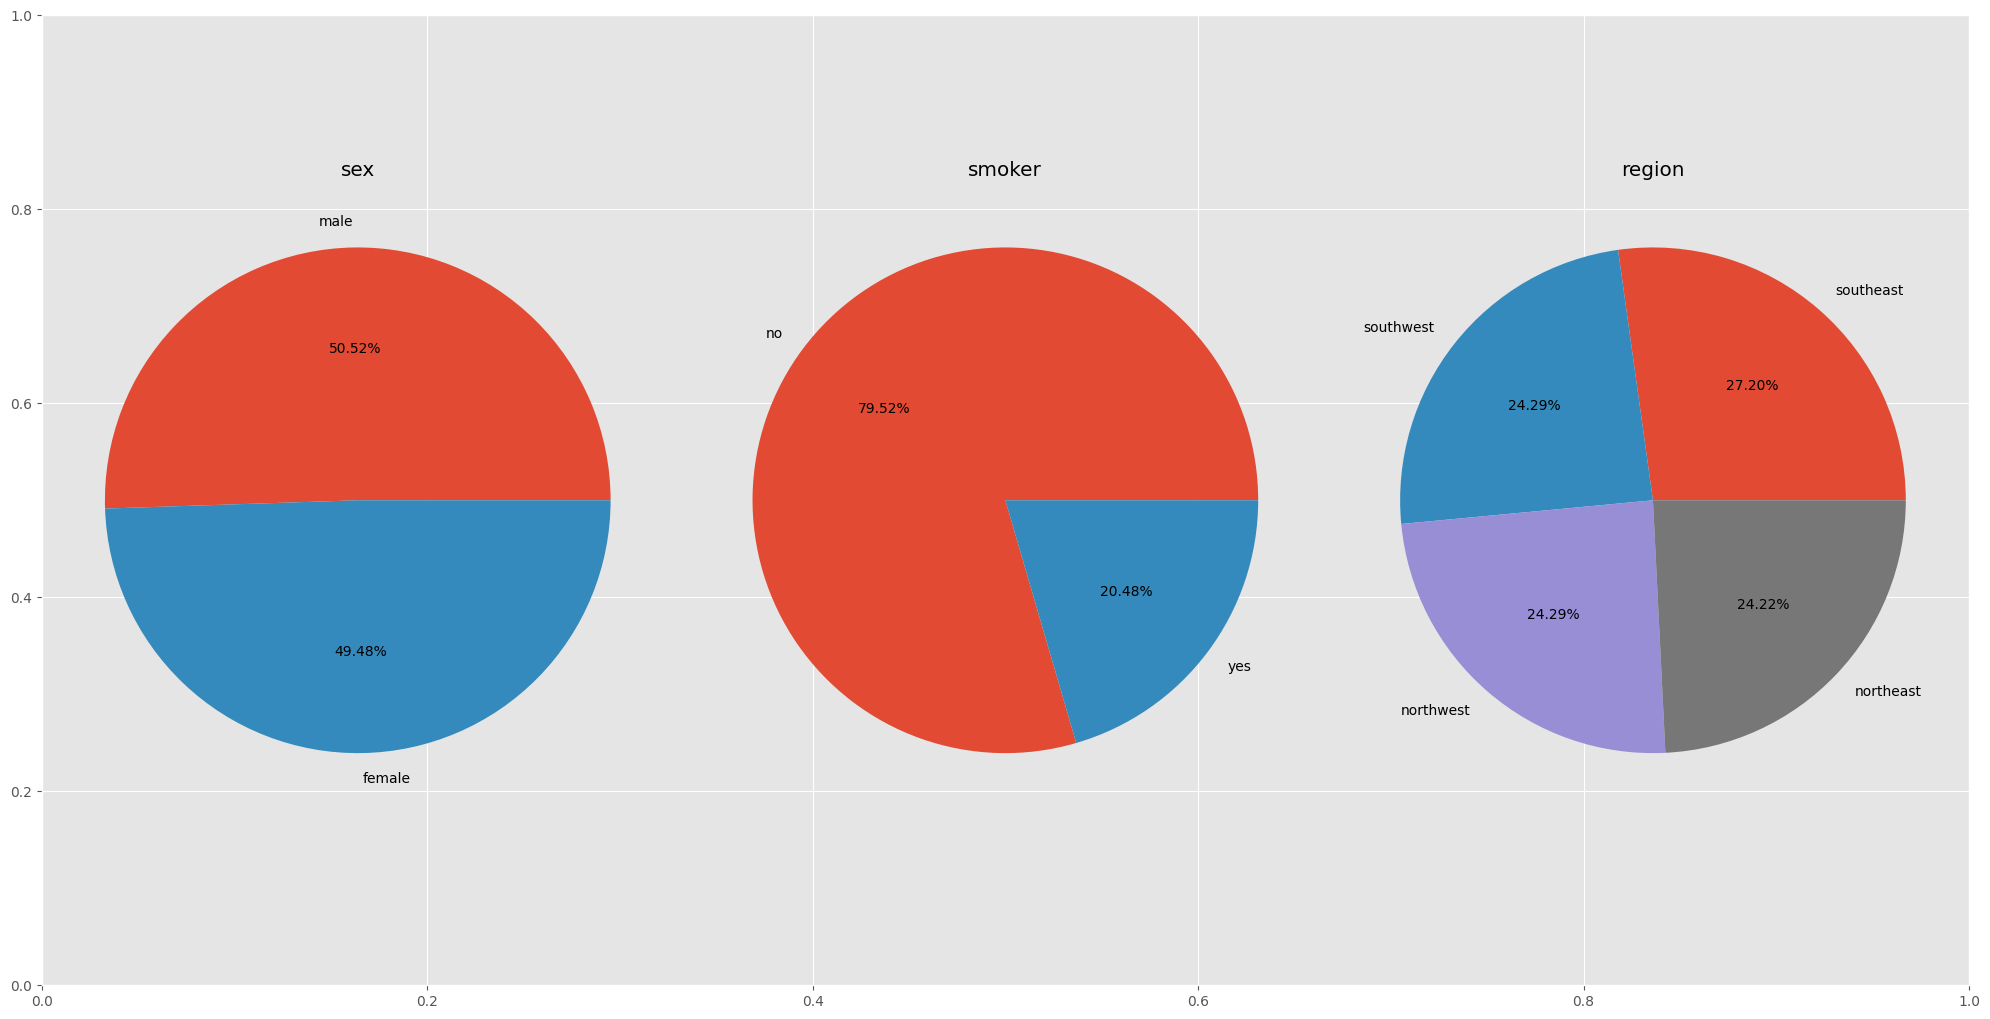

In [63]:
features=['sex','smoker', 'region']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(1,3,i+1)

  x=df[col].value_counts()
  plt.pie(x.values,labels=x.index,autopct='%1.2f%%')
  plt.title(col)
plt.tight_layout()

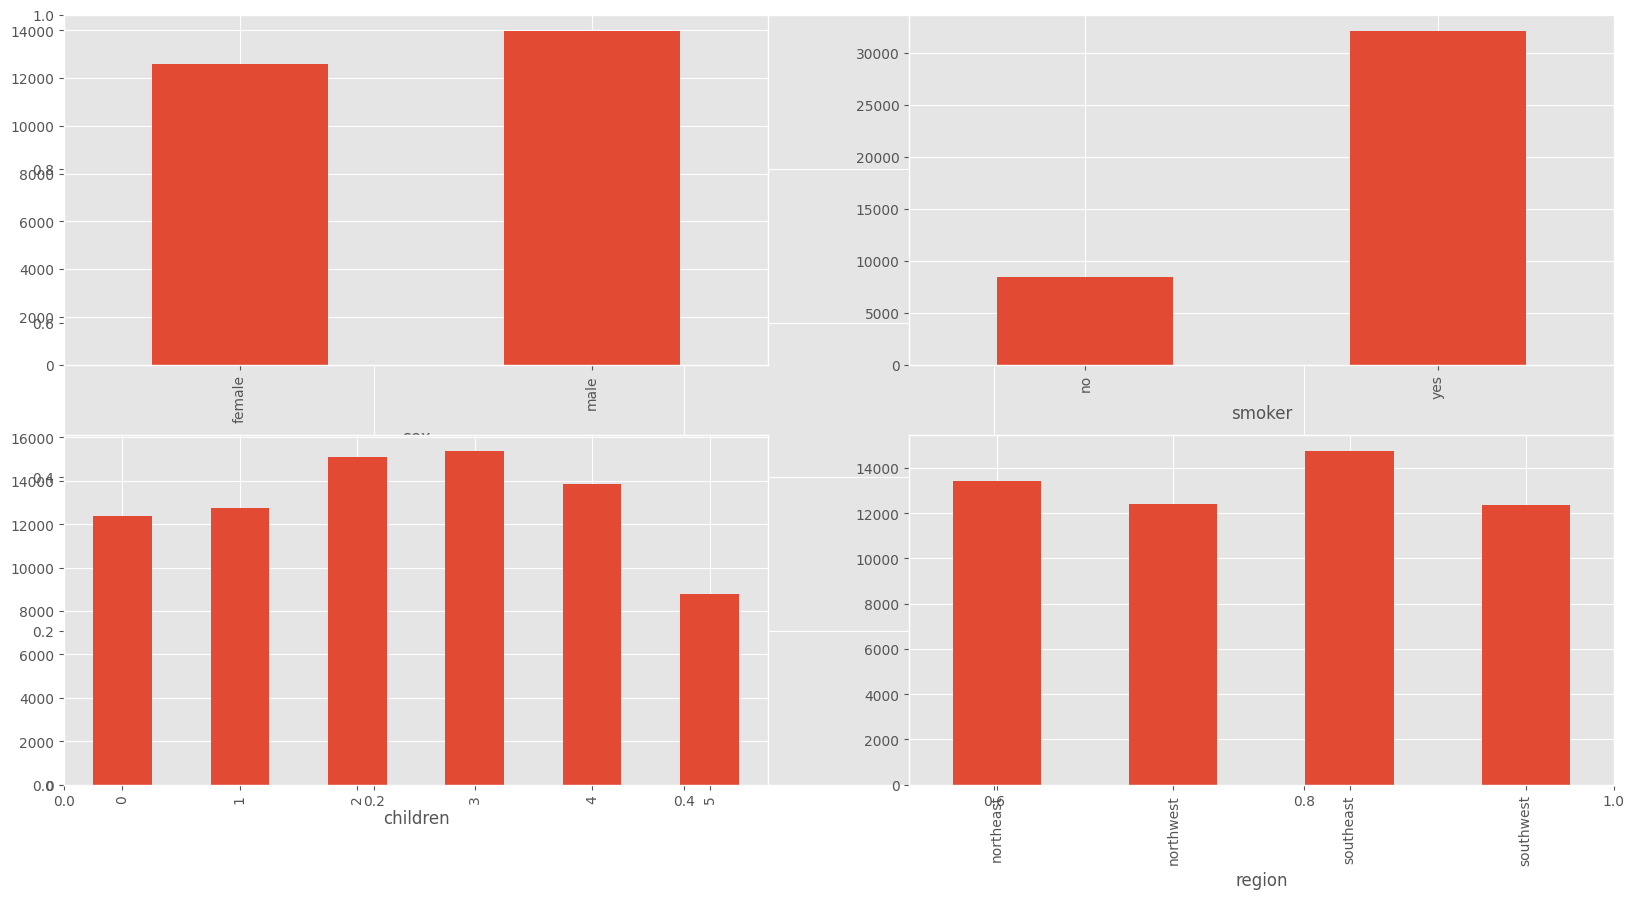

In [64]:
features=['sex','smoker','children','region']
plt.subplots(figsize=(20,10))

for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

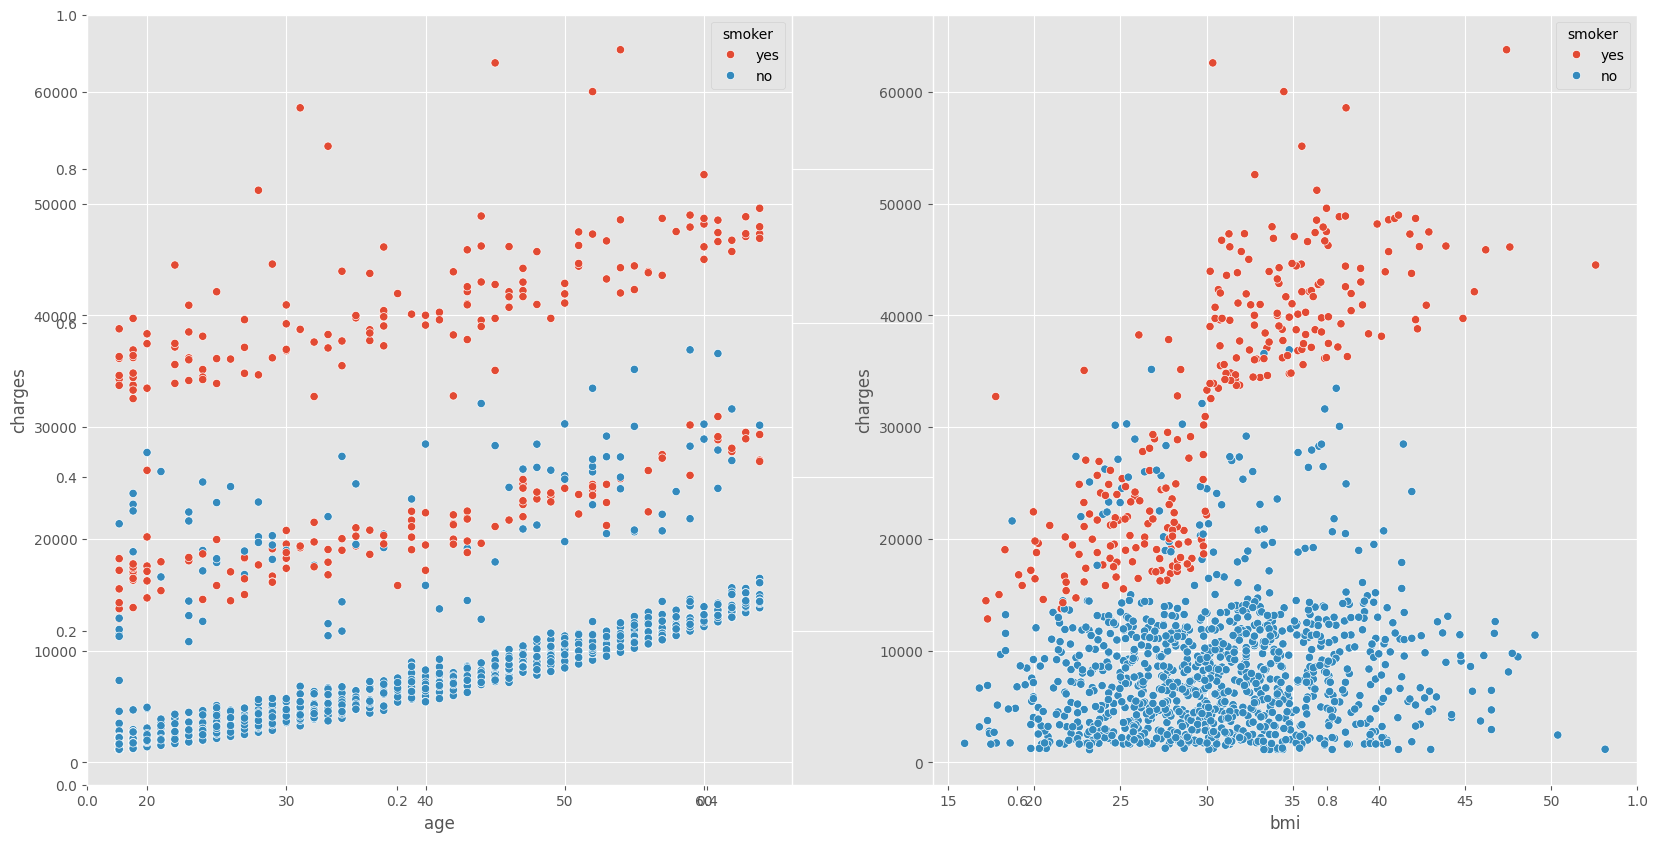

In [65]:
features=['age','bmi']
plt.subplots(figsize=(20,10))

for i,col in enumerate(features):
  plt.subplot(1,2,i+1)
  sns.scatterplot(data=df, x=col, y='charges',hue='smoker')
plt.show()

In [66]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='age'>

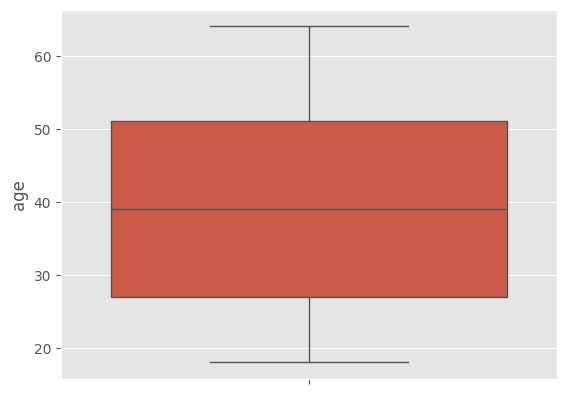

In [67]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

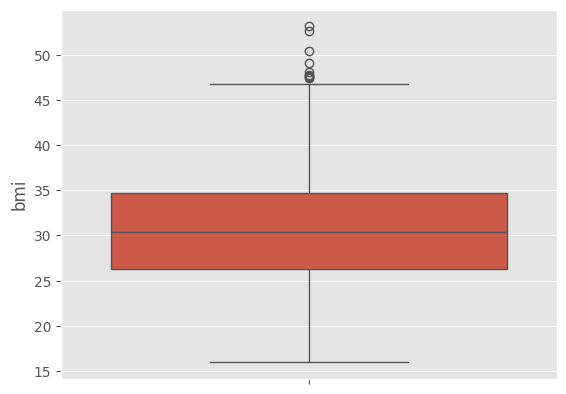

In [68]:
sns.boxplot(df['bmi'])

In [69]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.50)
Q3=df['bmi'].quantile(0.75)

IQR=Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

13.674999999999994
47.31500000000001


In [70]:
!pip install feature_engine

In [71]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb = ArbitraryOutlierCapper(min_capping_dict={'bmi':13.674999999999994},max_capping_dict={'bmi':47.31500000000001})

df[['bmi']]=arb.fit_transform(df[['bmi']])

<Axes: ylabel='bmi'>

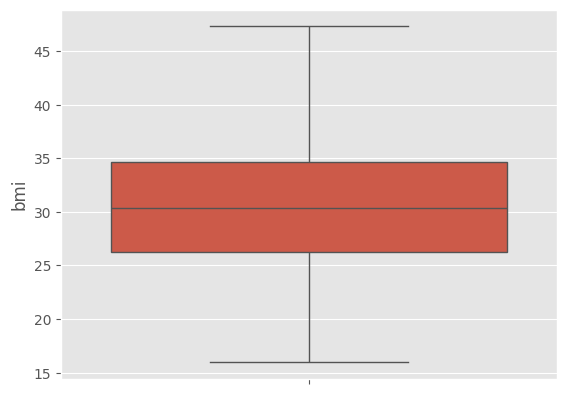

In [72]:
sns.boxplot(df['bmi'])

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
df['bmi'].skew()
df['age'].skew()

0.054780773126998195

In [75]:
df['sex']=df['sex'].map({'male':0, 'female':1})
df['smoker']=df['smoker'].map({'yes':1, 'no':0})
df['region']=df['region'].map({'northwest':0,'northeast':1,'southwest':2,'southeast':3})

In [76]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,-0.006691,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.017150,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.261154,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.053454,0.787234
region,-0.006691,-0.017150,0.261154,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.056070,1.000000


In [77]:
X = df.drop(['charges'], axis=1)
Y = df['charges']

In [78]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [79]:
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40, 50):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
  lr_model = LinearRegression()
  lr_model.fit(X_train, Y_train)
  l1.append(lr_model.score(X_train, Y_train))
  l2.append(lr_model.score(X_test, Y_test))
  cvs=(cross_val_score(lr_model, X, Y, cv=5)).mean()
  l3.append(cvs)
  df1=pd.DataFrame({'train_acc':l1, 'test_acc':l2,'cvs':l3})

In [80]:
df1

,train_acc,test_acc,cvs
0,0.741539,0.779138,0.747
1,0.756756,0.704260,0.747
2,0.729648,0.806362,0.747
3,0.753997,0.734113,0.747
4,0.742804,0.780840,0.747
5,0.753137,0.732727,0.747
6,0.741612,0.775969,0.747
7,0.732525,0.794691,0.747
8,0.751989,0.741911,0.747
9,0.756583,0.721869,0.747


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
print(lr_model.score(X_train, Y_train))
print(lr_model.score(X_test, Y_test))
cvs=(cross_val_score(lr_model, X, Y, cv=5)).mean()
print(cvs)

0.7296475807576607
0.8063624710782457
0.7469996197062543


In [82]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(X_train, Y_train)
y_pred_train=svrmodel.predict(X_train)
y_pred_test=svrmodel.predict(X_test)
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))
print((cross_val_score(svrmodel, X, Y, cv=5)).mean())

-0.1015150418030557
-0.13444586959905647
-0.10374692104571026


In [83]:
for model in [LinearRegression, Lasso, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor]:
  print(model)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
  model = model()
  model.fit(X_train, Y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  print("Train R2:", r2_score(Y_train, y_pred_train))
  print("Test R2:", r2_score(Y_test, y_pred_test))
  print("CV Score:", (cross_val_score(model, X, Y, cv=5)).mean())
  print()


<class 'sklearn.linear_model._base.LinearRegression'>
Train R2: 0.7296475807576607
Test R2: 0.8063624710782457
CV Score: 0.7469996197062543

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
Train R2: 0.7296474836967762
Test R2: 0.8063119331888563
CV Score: 0.7470082131602706

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
Train R2: 0.9745092924752954
Test R2: 0.8801474085497326
CV Score: 0.8366585153879976

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Train R2: 0.8956940691292328
Test R2: 0.9024918170294903
CV Score: 0.8548378657440446

<class 'xgboost.sklearn.XGBRegressor'>
Train R2: 0.9954190871352122
Test R2: 0.8574210053330951
CV Score: 0.8080768178656615



In [84]:
from sklearn.model_selection import GridSearchCV

estimatior = RandomForestRegressor(
    random_state=42
)

In [85]:
param_grid = {'n_estimators':[10,40,50,98,100,120,150]}
grid = GridSearchCV(estimatior, param_grid, scoring="r2", cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'n_estimators': 98}


In [86]:
rf_model=RandomForestRegressor(random_state=42, n_estimators=98)
rf_model.fit(X_train, Y_train)
y_pred_train=rf_model.predict(X_train)
y_pred_test=rf_model.predict(X_test)
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))
print((cross_val_score(rf_model, X, Y, cv=5)).mean())

0.9737482927504374
0.8800648670590465
0.8366462352498589


In [87]:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingRegressor()
param_grid = {'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19, learning_rate=0.2)
gbmodel.fit(X_train, Y_train)
y_pred_train=gbmodel.predict(X_train)
y_pred_test=gbmodel.predict(X_test)
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))
print((cross_val_score(gbmodel, X, Y, cv=5)).mean())

{'learning_rate': 0.2, 'n_estimators': 20}
0.8682397447116927
0.9017109716082662
0.8606660830850504


In [88]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train, Y_train)
y_pred_train=xgmodel.predict(X_train)
y_pred_test=xgmodel.predict(X_test)
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))
print((cross_val_score(xgmodel, X, Y, cv=5)).mean())

0.9954190871352122
0.8574210053330951
0.8080768178656615


In [89]:
from sklearn.model_selection import GridSearchCV
estimator = XGBRegressor()
param_grid = {'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
xgmodel.fit(X_train, Y_train)
y_pred_train=xgmodel.predict(X_train)
y_pred_test=xgmodel.predict(X_test)
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))
print((cross_val_score(xgmodel, X, Y, cv=5)).mean())

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8700755731767518
0.9024454317124272
0.8605811160326914


In [90]:
features_important=pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns, columns=['importance']).sort_values(by='importance', ascending=False)

In [91]:
features_important

,importance
smoker,0.809626
bmi,0.133449
age,0.038633
children,0.011073
region,0.007219
sex,0.000000


In [92]:
important_features=features_important[features_important['importance']>0.01]

In [93]:
important_features

,importance
smoker,0.809626
bmi,0.133449
age,0.038633
children,0.011073


In [94]:
df.drop(df[['sex','region']],axis=1, inplace=True)
Xf=df.drop(df[['charges']], axis=1)
X=df.drop(df[['charges']],axis=1)

X_train, X_test,Y_train, Y_test=train_test_split(Xf,Y,test_size=0.2,random_state=42)

In [95]:
final_model=XGBRegressor()
final_model.fit(X_train, Y_train)
y_pred_train=final_model.predict(X_train)
y_pred_test=final_model.predict(X_test)
print(r2_score(Y_train, y_pred_train))
print(r2_score(Y_test, y_pred_test))
print((cross_val_score(final_model, X, Y, cv=5)).mean())

0.9920927402536039
0.8466951006623197
0.8002197941201906


In [97]:
import pickle
pickle.dump(final_model, open('model.pkl', 'wb'))

In [98]:
#test
import pickle
import pandas as pd
from sklearn.metrics import r2_score

with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

sample_input = {
    'age': 30,
    'bmi': 25,
    'children': 2,
    'smoker': 0
}

input_df = pd.DataFrame([sample_input])
prediction = loaded_model.predict(input_df)[0]
print("Predicted charges:", prediction)

Predicted charges: 7075.805
